Вариант 6<br>

Задание 2. Оптимизация прибыли фирмы-монополиста

In [9]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from matplotlib import cm

In [10]:
def P(x):
    global params
    a, b, c, d, k, l, m, n = list(map(int, params))

    q1 = x[0]
    q2 = x[1]
    return -((1/b - k)*q1*q1 + (1/d - m)*q2*q2-a/b*q1 - c/d*q2 - l*q1*q2 - n)


#издержки С
def C(x, k, l, m, n):
    q1 = x[0]
    q2 = x[1]
    return k*q1**2 + l*q1*q2 + m*q2**2 + n


#градиент
def gradient(x):
    global params
    a, b, c, d, k, l, m, n = list(map(int, params))


    der = np.zeros_like(x)
    q1 = x[0]
    q2 = x[1]
    der[0] = -(2*(1/b-k)*q1-l*q2-a/b)
    der[1] = -(2*(1/d-m)*q2-l*q1-c/d)
    return der


def find_partial_derivative(a, b, c, d, k, l, m):
    res = [0, 0]

    res[0] = (sym.parsing.sympy_parser.parse_expr(f'{2*(1/b-k)}*q1-({l}*q2)-({a/b})'))
    res[1] = (sym.parsing.sympy_parser.parse_expr(f'{2*(1/d-m)}*q2-({l}*q1)-({c/d})'))
    return res


def Deriv2Dn(f, x=0, y=0):
    M = {'x':x,'y':y}
    x_s, y_s = sym.symbols('x y')
    value = eval(f)
    f = sym.parsing.sympy_parser.parse_expr(f)
    grad = {'x':eval(str(f.diff(x_s))),
            'y':eval(str(f.diff(y_s)))}
    
    hess = {'x': {'x': eval(str(f.diff(x_s).diff(x_s))), 'y': eval(str(f.diff(x_s).diff(y_s)))},
            'y': {'x': eval(str(f.diff(y_s).diff(x_s))), 'y': eval(str(f.diff(y_s).diff(y_s)))}}
    Delta1 = hess['x']['x']
    Delta2 = hess['x']['x']*hess['y']['y']-hess['x']['y']**2
    return {'Function': f, 'Point': M, 'Value_Func:': value, 'Gradient': grad, 'Hessian': hess, 'Delta1': Delta1, 'Delta2': Delta2}


a, b, c, d, k, l, m, n = [82, -2, 39, -1, 3, 5, 2, 8]

print(f'Функция спроса q1:')
display(sym.parsing.sympy_parser.parse_expr(f'{a} + ({b} * p1)'))

print(f'Функция спроса q2:')
display(sym.parsing.sympy_parser.parse_expr(f'{c} + ({d} * p2)'))

print(f'Функция издержек С:')
display(sym.parsing.sympy_parser.parse_expr(f'{k}*q1**2 + {l}*q1*q2 + {m}*q2**2 + {n}'))


f = f"{1/b - k}*q1**2 + ({1/d - m}*q2**2) - ({a/b}*q1) - ({c/d}*q2) - ({l}*q1*q2) - ({n})"
print("Функция для минимизации")
display(sym.parsing.sympy_parser.parse_expr(f))

find_partial_derivative(a, b, c, d, k, l, m)


x0 = np.array([0.5, 0.5])
res = minimize(P, x0, method='BFGS', jac=gradient, options={'disp': True})

print('Найденные параметры для q1 и q2:', res.x)
print('Максимальное значение функции:',-res.fun)

# Вычисление градиента и гессиана исследуемой функции в точке экстремума
Deriv2Dn(f'{1/b - k}*x**2 + ({1/d - m}*y**2) - ({a/b}*x) - ({c/d}*y) - ({l}*x*y) - ({n})',x=res.x[0],y=res.x[1])

Функция спроса q1:


82 - 2*p1

Функция спроса q2:


39 - p2

Функция издержек С:


3*q1**2 + 5*q1*q2 + 2*q2**2 + 8

Функция для минимизации


-3.5*q1**2 - 5*q1*q2 + 41.0*q1 - 3.0*q2**2 + 39.0*q2 - 8

Optimization terminated successfully.
         Current function value: -131.500000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Найденные параметры для q1 и q2: [3.00000048 4.00000026]
Максимальное значение функции: 131.49999999999838


{'Function': -3.5*x**2 - 5*x*y + 41.0*x - 3.0*y**2 + 39.0*y - 8,
 'Point': {'x': 3.0000004806606424, 'y': 4.000000256713833},
 'Value_Func:': 131.49999999999838,
 'Gradient': {'x': -4.648193666412226e-06, 'y': -3.943586214916195e-06},
 'Hessian': {'x': {'x': -7.0, 'y': -5}, 'y': {'x': -5, 'y': -6.0}},
 'Delta1': -7.0,
 'Delta2': 17.0}

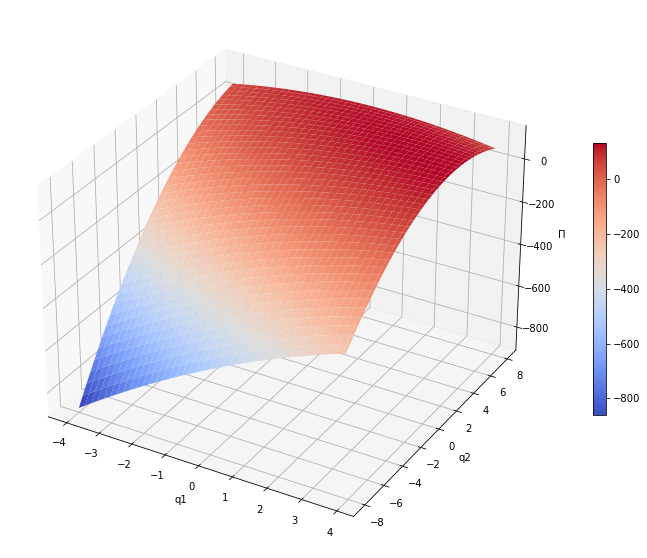

In [14]:
# Настраиваем 3D график
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

#ax.view_init(15, 10)

X = np.arange(-4, 4, 0.1)
Y = np.arange(-8, 8, 0.1)
X, Y = np.meshgrid(X, Y)
Z = -P(np.array([X,Y]))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.set_zlabel('П')

plt.show()

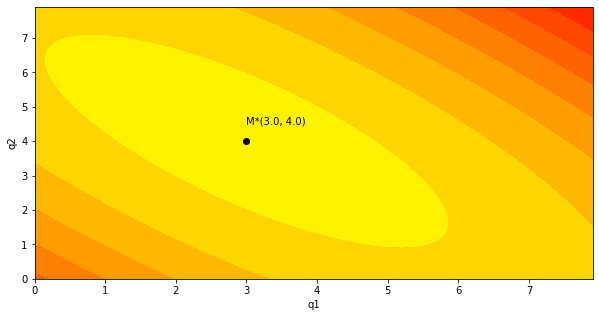

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

u = res.x[0]
v = res.x[1]
X = np.arange(0, 8, 0.1)
Y = np.arange(0, 8, 0.1)
X, Y = np.meshgrid(X, Y)
Z = -P(np.array([X,Y]))

ax.contourf(X, Y, Z, cmap='autumn')
ax.plot(u, v, 'ko')
ax.text(u, v+0.5, f'M*({u.round(3)}, {v.round(3)})')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
plt.show()